<a href="https://colab.research.google.com/github/stefymojica/MACC/blob/main/modelos_enfermedad_coronaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediccion del Riesgo de Enfermedad Coronaria**

## Matematicas Aplicadas y Ciencias de la Computacion
## Estudiante: Stefany Paola Mojica Melo


# **Configuracion Inicial - Librerias y Carga de Archivo**

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.formula.api import logit

sns.set_theme(style="whitegrid", palette="viridis")

In [31]:
file_path = '/content/framingham.csv'

try:
  df = pd.read_csv(file_path)
  print("El archivo se cargó correctamente.")
except FileNotFoundError:
  print(f"El archivo '{file_path}' no se encontró.")

El archivo se cargó correctamente.


# **Analisis Exploratorio de Datos**

## Objetivo clinico:

Anticipar el riesgo de desarrollar la enfermedad coronaria a 10 años permite poder prevenir la enfermedad de manera temprana, poder identificar a los pacientes que tienen un alto riesgo antes de presentrar un evento cardiovascular.

Ayuda a que los medicos puedan adoptar estrategias de manera temprana, empezar con tratamientos un poco mas personalizados.

Ademas, se empiezan a priorizar pacientes que tienen un mayor riesgo de presentar la enfermedad y permiten que el paciente conozca el riesgo que se estima con  años de anterioridad, generando motivaciones para que el paciente cambie sus conductas en cuanto a dieta, ejercicio, entre otros habitos que ayudaran a que no se presente la enfermedad.

In [32]:
# Paso 1 - descripcion general del dataframe
if 'df' in locals():

    print("--- 1. Información General del DataFrame ---")
    df.info()
    print("\n" + "="*50 + "\n")

    print("--- 2. Primeras 5 Filas del DataFrame ---")
    display(df.head())
    print("\n" + "="*50 + "\n")

    print("--- 3. Resumen Estadístico de Columnas Numéricas ---")
    display(df.describe())

else:
    print("Error: El DataFrame 'df' no ha sido definido.")
    print("Por favor, completa el Paso 0: Carga de Datos.")

--- 1. Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), 

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0




--- 3. Resumen Estadístico de Columnas Numéricas ---


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [33]:
for col in ["education","currentSmoker","BPMeds","prevalentStroke","prevalentHyp","diabetes"]:
  print(f" Columna {col} - Valores Unicos: {df[col].unique()}")

 Columna education - Valores Unicos: [ 4.  2.  1.  3. nan]
 Columna currentSmoker - Valores Unicos: [0 1]
 Columna BPMeds - Valores Unicos: [ 0.  1. nan]
 Columna prevalentStroke - Valores Unicos: [0 1]
 Columna prevalentHyp - Valores Unicos: [0 1]
 Columna diabetes - Valores Unicos: [0 1]


#### Hallazgos
- Education : Es una variable categorica ordinal, es decir, sus valores puede representar una jerarquia
  - Tratamiento : ordinal encoding
- Tratar los valores binarios que estan en decimal convertirlos a Enteros

--- Columnas con Valores Faltantes ---


,conteo_faltantes,porcentaje_faltantes,tipo de dato
glucose,388,9.155262,float64
education,105,2.477584,float64
BPMeds,53,1.250590,float64
totChol,50,1.179802,float64
cigsPerDay,29,0.684285,float64
BMI,19,0.448325,float64
heartRate,1,0.023596,float64


--- Barras con columnas de valores faltantes---


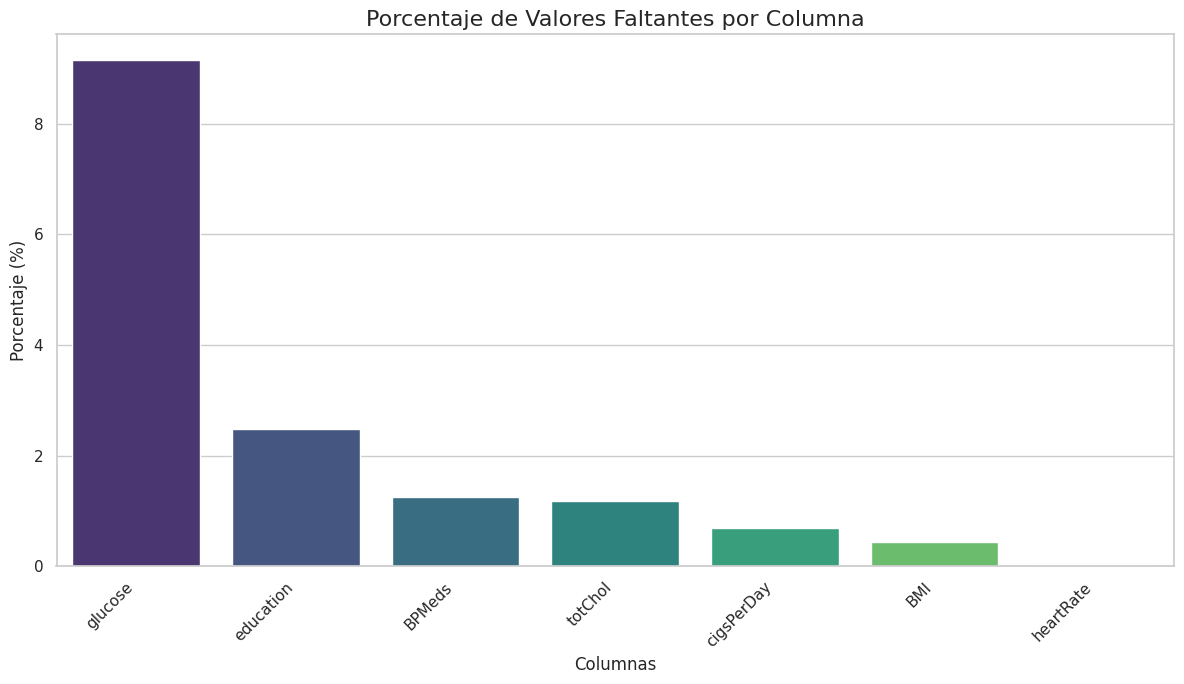

--- Histogramas de columnas con valores faltantes---


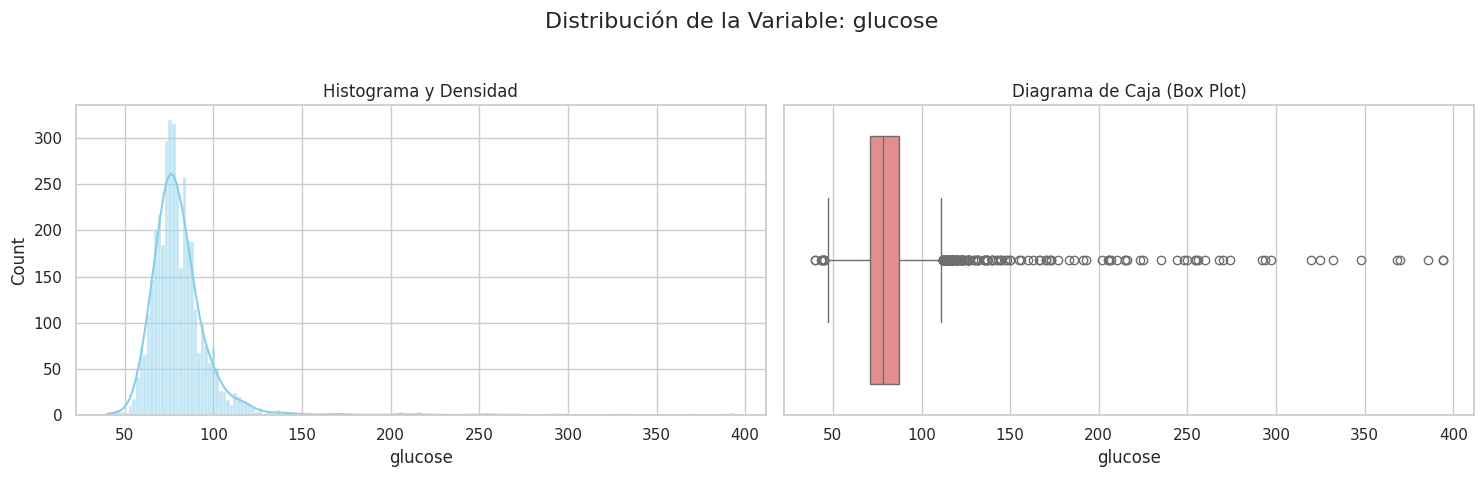

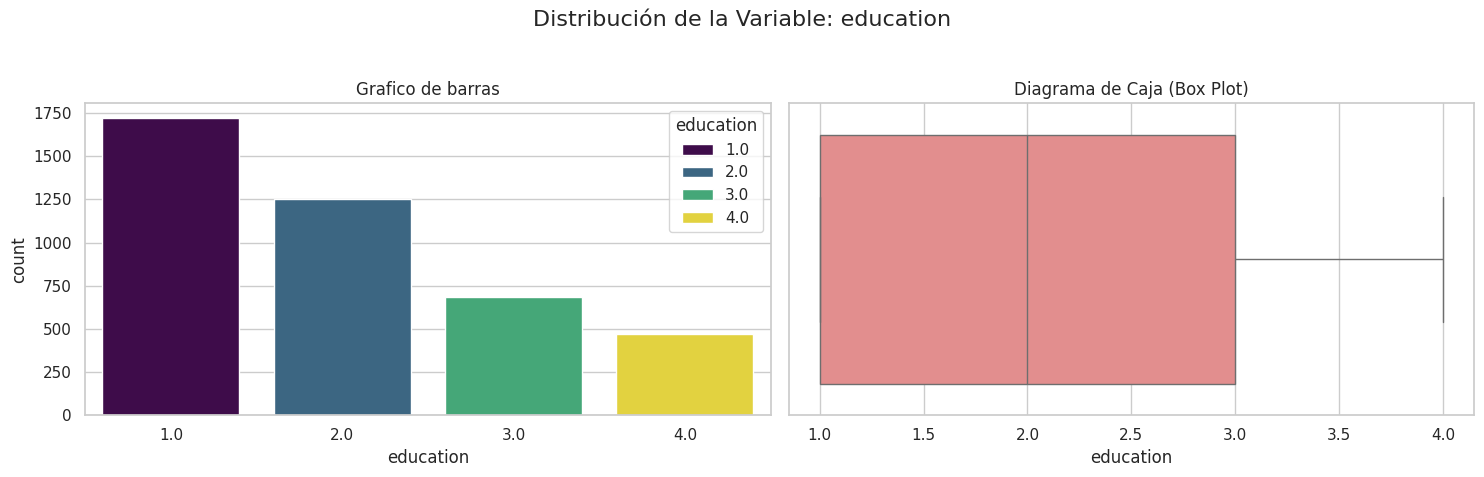

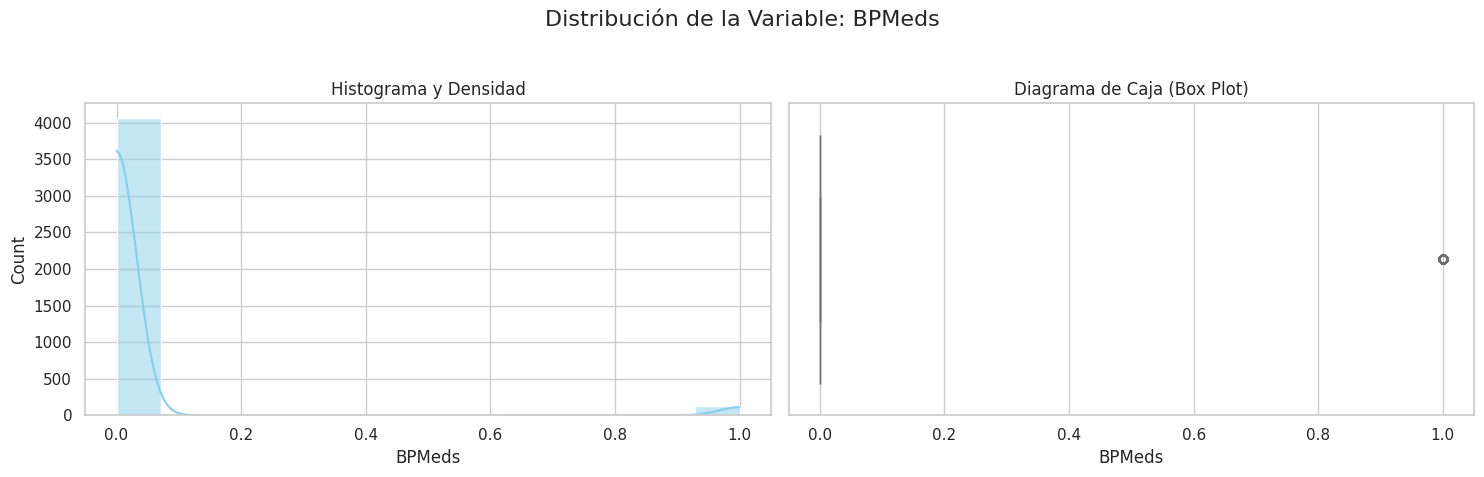

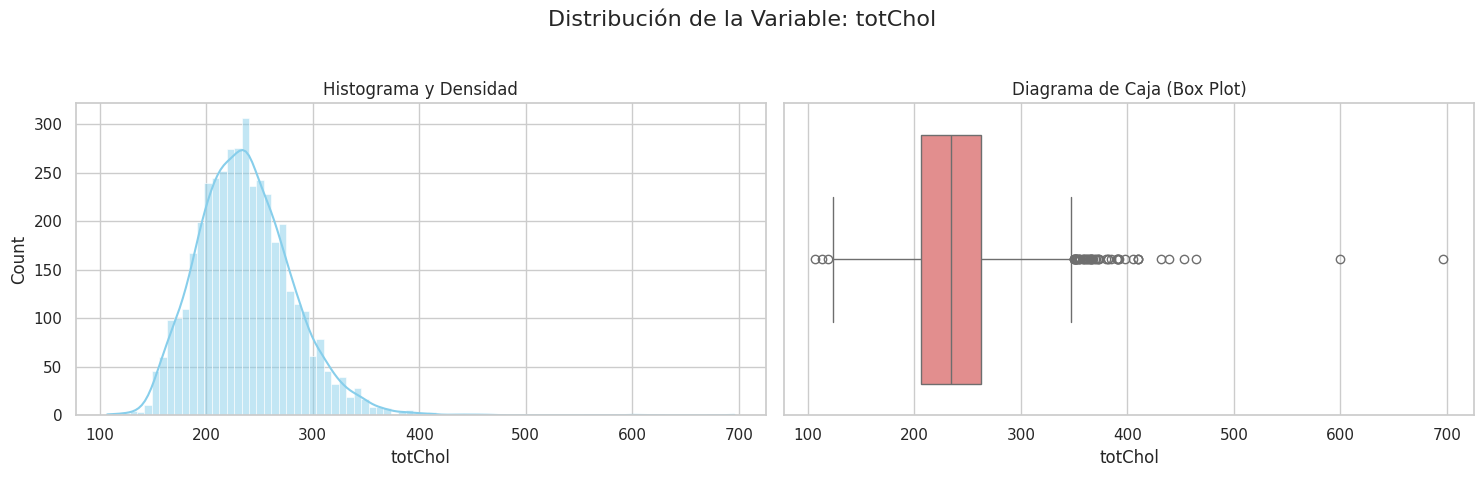

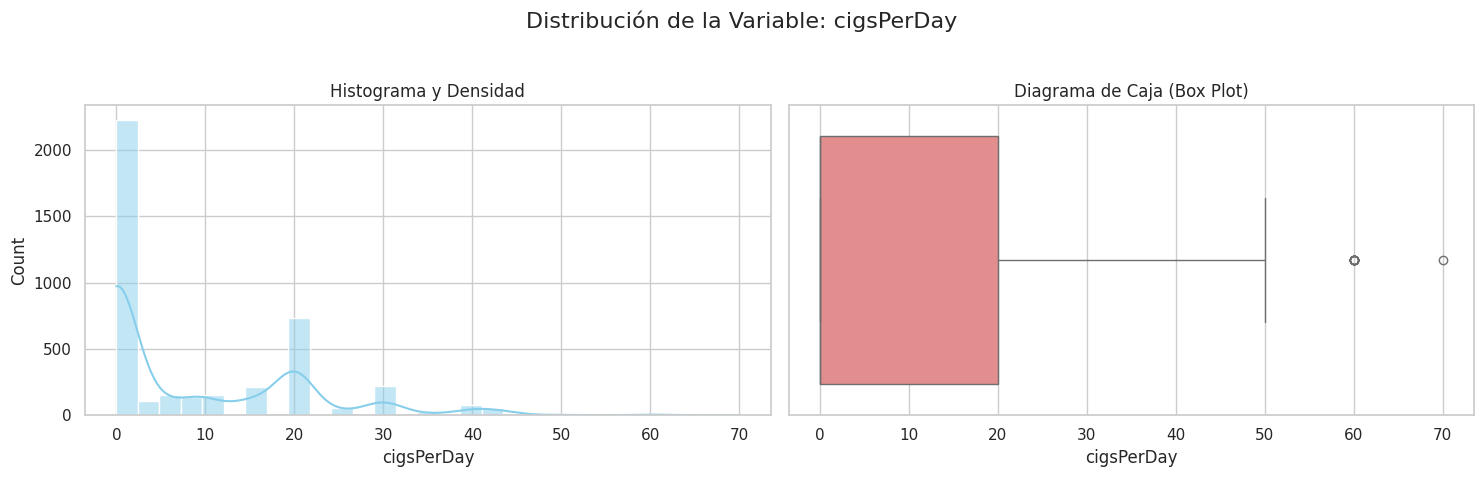

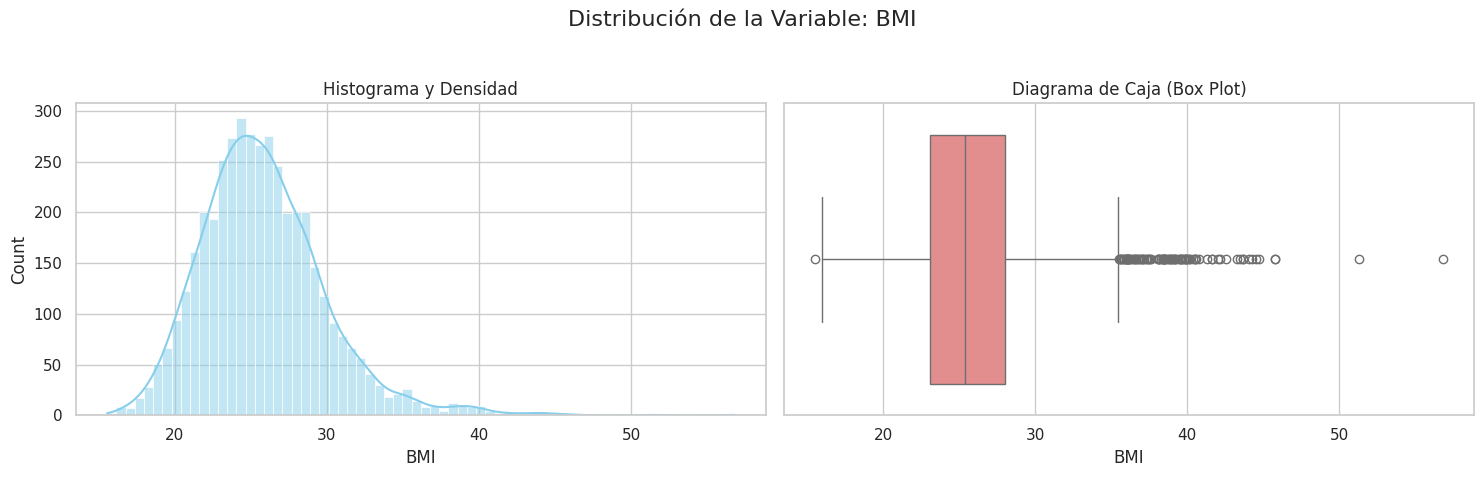

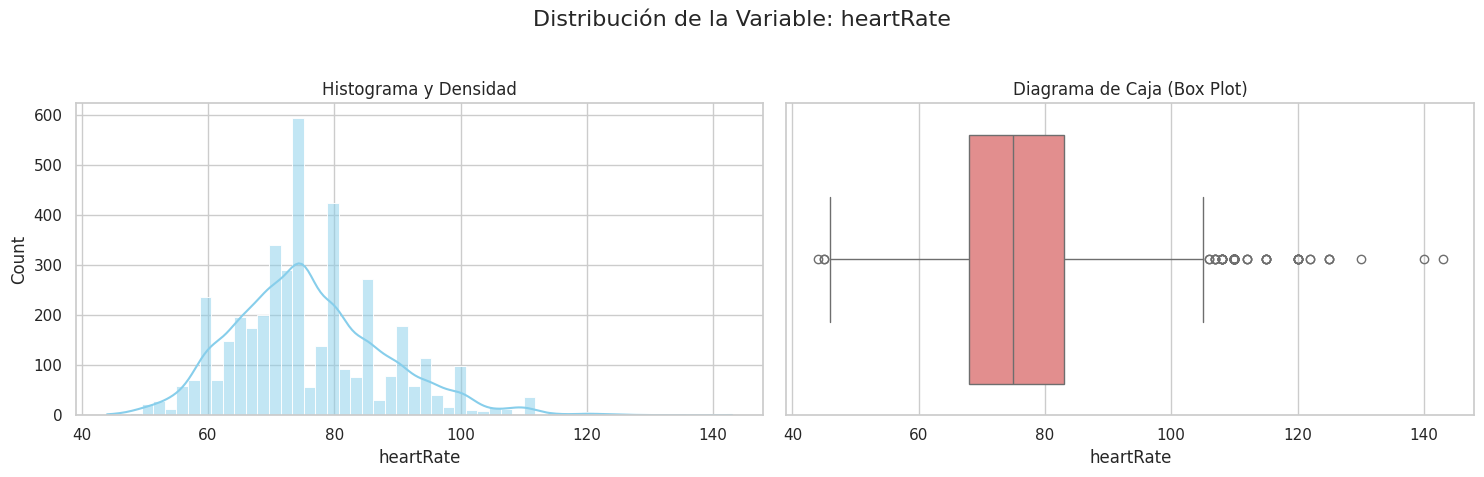

In [34]:
if 'df' in locals():
    null_values_count = df.isnull().sum()
    total_rows = len(df)
    null_values_percentage = (null_values_count / total_rows) * 100
    d_type = df.dtypes

    null_data_report = pd.DataFrame({
        'conteo_faltantes': null_values_count,
        'porcentaje_faltantes': null_values_percentage,
        'tipo de dato': d_type
    })

    missing_data_report = null_data_report[
        null_data_report['conteo_faltantes'] > 0
    ].sort_values(by='porcentaje_faltantes', ascending=False)

    print("--- Columnas con Valores Faltantes ---")
    if not missing_data_report.empty:
        display(missing_data_report)

        print("--- Barras con columnas de valores faltantes---")

        plt.figure(figsize=(12, 7))
        sns.barplot(
            x=missing_data_report.index,
            y=missing_data_report['porcentaje_faltantes'],
            hue=missing_data_report.index,
            palette='viridis',
            legend=False
        )
        plt.title('Porcentaje de Valores Faltantes por Columna', fontsize=16)
        plt.xlabel('Columnas', fontsize=12)
        plt.ylabel('Porcentaje (%)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        print("--- Histogramas de columnas con valores faltantes---")
        cols_with_na = missing_data_report.index.tolist()
        for col in cols_with_na:
          if col != "education":
            fig, axes = plt.subplots(1, 2, figsize=(15, 5))
            fig.suptitle(f'Distribución de la Variable: {col}', fontsize=16)
            sns.histplot(data=df, x=col, kde=True, ax=axes[0], color='skyblue')
            axes[0].set_title('Histograma y Densidad')
            sns.boxplot(data=df, x=col, ax=axes[1], color='lightcoral')
            axes[1].set_title('Diagrama de Caja (Box Plot)')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()
          else:
            fig, axes = plt.subplots(1, 2,figsize=(15, 5))
            fig.suptitle(f'Distribución de la Variable: {col}', fontsize=16)
            sns.countplot(df, x=col, hue="education",palette='viridis',ax=axes[0])
            axes[0].set_title('Grafico de barras')
            sns.boxplot(data=df, x=col, ax=axes[1], color='lightcoral')
            axes[1].set_title('Diagrama de Caja (Box Plot)')
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            plt.show()

    else:
        print("No se encontraron valores faltantes")

else:
    print("Error: El DataFrame 'df' no ha sido definido.")

In [35]:
# Conteo de clases en la variable target
conteo = df['TenYearCHD'].value_counts()
proporcion = df['TenYearCHD'].value_counts(normalize=True) * 100
print("Conteo de clases:")
print(conteo)
print("\nProporción (%):")
print(proporcion)


Conteo de clases:
TenYearCHD
0    3594
1     644
Name: count, dtype: int64

Proporción (%):
TenYearCHD
0    84.804153
1    15.195847
Name: proportion, dtype: float64


### Analisis Desbalance de clases
La variable target TenYearCHD tiene un desbalance, donde las personas que no han tenido la enfermedad ocupan el 84.80% del dataset. Esto implica que el entrenamiento tiene una mayor probabilidad de que aprenda a distinguir las personas que no sufriran la enfermedad sobre aquellas que si la van a sufrir.

Para el entorno medico, es preferible conocer aquellas personas que si van a sufrir la enfermedad, por eso, el dataset al estar tan desbalanceado puede generar falsos negativos, es decir, predecir que no va a tener la enfermedad cuando en realidad si la va a tener.

En cuanto a la seleccion de metricas, hay que tener en cuenta metricas que soporten un desbalance en el codigo como Recall, AUC - ROC.

### Metricas de Evaluacion

Para este dataset, al estar los datos desbalanceados el modelo va a apredecir que la mayoria de las personas no van a desarrollar la enfermedad coronaria.

Al usar la metrica del acurracy, el modelo podria alcanzar una exactitud probablemente del 90%, pero fallaria al identificar esa poblacion pequeña que si tiene riesgo de predecir la enfermedad y para este caso al ser clinico, es mas importante conocer los pacientes que con exactitud van a padecer el riesgo.

Algunas de las metricas que se pueden tener en cuenta son:
- Recall : mide la proporcion de pacientes identificados que pueden sufrir la enfermedad
- El AUC-ROC : evaluade manera global el rendimiento del modelo

--- Análisis de Correlación ---


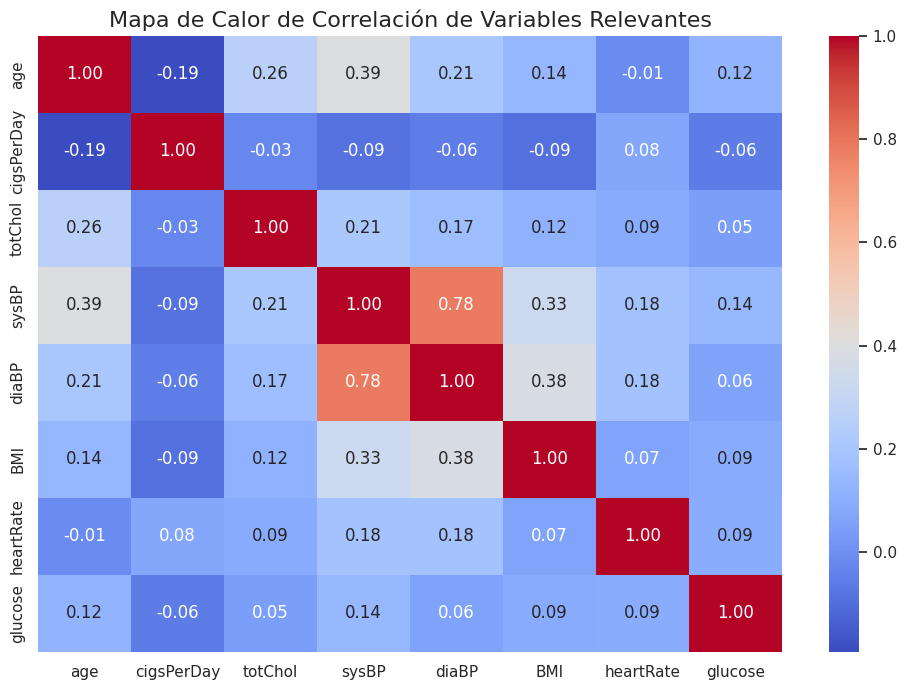

In [36]:
"""
Análisis de correlación enfocado en variables continuas.
"""

if 'df' in locals():
    print("--- Análisis de Correlación ---")

    df_for_correlation = df.copy()


    columns= [
        'age',
        'cigsPerDay',
        'totChol',
        'sysBP',
        'diaBP',
        'BMI',
        'heartRate',
        'glucose'
    ]

    df_2 = df_for_correlation[columns]
    correlation_matrix = df_2.corr(method='pearson')

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f"
    )
    plt.title('Mapa de Calor de Correlación de Variables Relevantes', fontsize=16)
    plt.show()

else:
    print("Error: El DataFrame 'df' no ha sido definido.")

### Analisis de correlacion
De acuerdo a la grafica de correlacion, las variables de sysBP y diaBP su correlacion es muy fuerte con un 0.78% de correlacion, las demas correlaciones son moderadas a bajas lo que permite que aporten mas informacion.

Las variables que estan muy correlacionadas estan causando multicolinealidad y eso en un modelo posterior muestra mucha redundancia de informacion lo que hace que no se aproveche el maximo la informacion. Esta multicolinealidad se puede tratar ya sea eliminando una variable o utilizando tecnicas de regularizacion, que permitiran disminuir esa correlacion.

# Preprocesamiento y Preparacion de Datos


In [37]:
# Imputacion para las columnas con valores nulos

# Imputacion Mediana
for col in ['glucose', 'totChol', 'cigsPerDay', 'BMI']:
    df[col].fillna(df[col].median(), inplace=True)

# Imputacion Moda
for col in ['education', 'BPMeds']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Imputacion Media/Promedio
for col in ['heartRate']:
    df[col].fillna(df[col].mean(), inplace=True)


# Confirmacion de valores en  nulo
null_values_count = df.isnull().sum()
total_rows = len(df)
null_values_percentage = (null_values_count / total_rows) * 100

null_data_report = pd.DataFrame({
  'conteo_faltantes': null_values_count,
  'porcentaje_faltantes': null_values_percentage,
})
print(null_data_report)

                 conteo_faltantes  porcentaje_faltantes
male                            0                   0.0
age                             0                   0.0
education                       0                   0.0
currentSmoker                   0                   0.0
cigsPerDay                      0                   0.0
BPMeds                          0                   0.0
prevalentStroke                 0                   0.0
prevalentHyp                    0                   0.0
diabetes                        0                   0.0
totChol                         0                   0.0
sysBP                           0                   0.0
diaBP                           0                   0.0
BMI                             0                   0.0
heartRate                       0                   0.0
glucose                         0                   0.0
TenYearCHD                      0                   0.0


/tmp/ipython-input-2971422254.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2971422254.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Analisis tipo de Imputacion para valores faltantes
Para la eleccion del tipo de imputacion, se adiciono un grafico de histograma y boxplot que permite evidenciar de manera mas clara la distribucion de los datos, para asi lograr ver sesgos y outliers.

Para La imputacion con la medida de la Mediana se realizo para las siguientes columnas debido a que estas presentaban mas sesgos en los datos, y las colas en los extremos eran un poco mas largas mostrando que habia outliers, por esto, se elige esta medida ya que no sera afectada por los outliers ya que el valor corresponde a la posicion central de las distribuciones. Las columnas son las siguientes:

- glucose
- totChol
- cigsPerDay
- BMI

La imputacion con la medida de la Moda se realizo ya que son columnas con valores discretos, con la finalidad de que mantenga esos mismos datos. Se realizo para las siguientes columnas:
- education
- BPMeds

La imputacion con la medida de la Media se realizo para la siguiente columna ya que no representa mucho porcentaje en los datos:
- heartRate

In [38]:
# Conversion del tipo de dato
df["education"] = df["education"].astype(int).astype("category")
df["BPMeds"] = df["BPMeds"].astype(int)
print(df.dtypes)

male                  int64
age                   int64
education          category
currentSmoker         int64
cigsPerDay          float64
BPMeds                int64
prevalentStroke       int64
prevalentHyp          int64
diabetes              int64
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD            int64
dtype: object


In [39]:
# Tramiento a Ordinal Encoder

encoder = OrdinalEncoder()
df['education_encoder'] = encoder.fit_transform(df[['education']])

print(df['education_encoder'].unique())

[3. 1. 0. 2.]


In [40]:
# Feature Engineering
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Division de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Analisis Division de datos
Es importante dividir los datos en entrenamiento y prueba porque al no hacerse esta division el modelo puede llegar a memorizar en vez de aprender los patrones generales, entonces al separar el conjunto de pruebas se le esta pasando informacion nueva al modelo .

Este tipo de division ayuda al overfitting en las predicciones

In [41]:
# Seleccion de variables numericas sin variable target
numeric_cols_original = df.select_dtypes(include=np.number).drop(columns=['TenYearCHD','education_encoder']).columns.tolist()
print("Columnas numéricas originales:", numeric_cols_original)

# Escalado de variables numericas
scaler = StandardScaler()

# Escalado para data de entrenamiento
X_train_scaled = scaler.fit_transform(X_train[numeric_cols_original])
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns=numeric_cols_original)

# Escalado para data de test
X_test_scaled = scaler.fit_transform(X_test[numeric_cols_original])
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns=numeric_cols_original)

Columnas numéricas originales: ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### Analisis Escalado de caracteristicas
KNN es un algoritmo que se basa en clasificar las distancias entre puntos, es decir, que si una variable tiene una mayor escala puede llegar a dominar la distancia. El escalado es obligatorio porque obliga a que todas las variables manejen el mismo calculo de distancia.

El escalado se realizo unicamente para las variables numericas y no se tomo en cuenta la variable de "education" y "education_encoder" ya que esta es categorica y se realizo previamente un tratado para volverla ordinal encoder.

Ademas, no se tomo en cuenta la variable target aunque esta sea numerica, ya que es el valor que se va a predecir.

In [42]:
# Union variables escaladas y variable education
X_train_final = pd.concat([X_train_scaled, X_train['education_encoder']], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test['education_encoder']], axis=1)


# Modelado con KNN

## Seleccion de K - Metodo de Validacion cruzada

  - k =  1, F1-Score Promedio = 0.2436
  - k =  3, F1-Score Promedio = 0.1979
  - k =  5, F1-Score Promedio = 0.1751
  - k =  7, F1-Score Promedio = 0.1645
  - k =  9, F1-Score Promedio = 0.1080
  - k = 11, F1-Score Promedio = 0.0673
  - k = 13, F1-Score Promedio = 0.0637
  - k = 15, F1-Score Promedio = 0.0535
  - k = 17, F1-Score Promedio = 0.0331
  - k = 19, F1-Score Promedio = 0.0335
  - k = 21, F1-Score Promedio = 0.0303
  - k = 23, F1-Score Promedio = 0.0216
  - k = 25, F1-Score Promedio = 0.0260
  - k = 27, F1-Score Promedio = 0.0171
  - k = 29, F1-Score Promedio = 0.0213
  - k = 31, F1-Score Promedio = 0.0172
  - k = 33, F1-Score Promedio = 0.0172
  - k = 35, F1-Score Promedio = 0.0131
  - k = 37, F1-Score Promedio = 0.0085
  - k = 39, F1-Score Promedio = 0.0085
  - k = 41, F1-Score Promedio = 0.0000
  - k = 43, F1-Score Promedio = 0.0000
  - k = 45, F1-Score Promedio = 0.0000
  - k = 47, F1-Score Promedio = 0.0000
  - k = 49, F1-Score Promedio = 0.0000
  - k = 51, F1-Score Prom

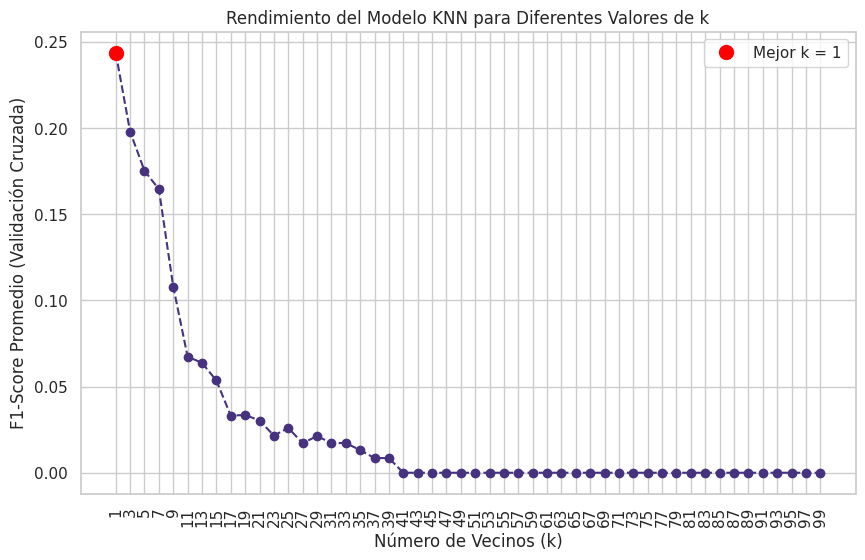

In [43]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier

# Rango de los valores que puede tomar el K, en este caso es del 1 al 100
k_values = range(1, 100, 2)
X_train_np = X_train_final.values
y_train_np = y_train.values

f1_scores_sk = []

# validacion cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    fold_scores = []

    for train_index, val_index in kf.split(X_train_np):
        X_train_fold, X_val_fold = X_train_np[train_index], X_train_np[val_index]
        y_train_fold, y_val_fold = y_train_np[train_index], y_train_np[val_index]

        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)

        fold_scores.append(f1_score(y_val_fold, y_val_pred))

    average_f1 = np.mean(fold_scores)
    f1_scores_sk.append(average_f1)
    print(f"  - k = {k:2d}, F1-Score Promedio = {average_f1:.4f}")

best_k_index = np.argmax(f1_scores_sk)
best_k = list(k_values)[best_k_index]
best_f1 = f1_scores_sk[best_k_index]

print("-" * 50)
print(f"Mejor valor encontrado: k = {best_k} con un F1-Score promedio de {best_f1:.4f}")
print("-" * 50)

plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores_sk, marker='o', linestyle='--')
plt.title('Rendimiento del Modelo KNN para Diferentes Valores de k')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('F1-Score Promedio (Validación Cruzada)')
plt.xticks(list(k_values), rotation=90)
plt.grid(True)

# Se resalta el mejor punto
plt.plot(best_k, best_f1, 'ro', markersize=10, label=f'Mejor k = {best_k}')
plt.legend()
plt.show()


 Reporte de Clasificación Final para KNN (k=1):

                   precision    recall  f1-score   support

No Enfermedad (0)       0.86      0.87      0.87      1079
   Enfermedad (1)       0.22      0.19      0.20       193

         accuracy                           0.77      1272
        macro avg       0.54      0.53      0.53      1272
     weighted avg       0.76      0.77      0.77      1272


 Reporte de Clasificación Final para KNN (k=100):

                   precision    recall  f1-score   support

No Enfermedad (0)       0.85      1.00      0.92      1079
   Enfermedad (1)       0.00      0.00      0.00       193

         accuracy                           0.85      1272
        macro avg       0.42      0.50      0.46      1272
     weighted avg       0.72      0.85      0.78      1272



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


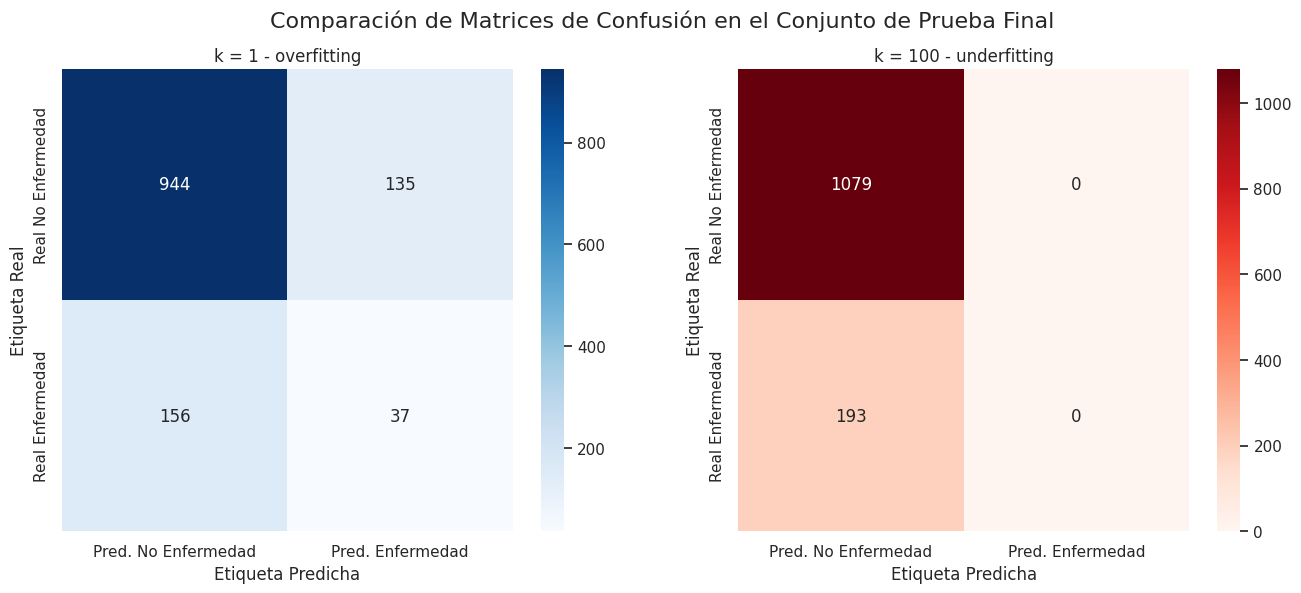

In [44]:
# KNN CON K = 1
sklearn_knn1 = KNeighborsClassifier(n_neighbors=1, weights='distance')

# Entrenamiento
sklearn_knn1.fit(X_train_final, y_train)

# Hacer predicciones a los casos de prueba
y_pred_knn1 = sklearn_knn1.predict(X_test_final)

print("\n Reporte de Clasificación Final para KNN (k=1):\n")
print(classification_report(y_test, y_pred_knn1, target_names=['No Enfermedad (0)', 'Enfermedad (1)']))

# Visualizar la Matriz de Confusión
cm_knn1 = confusion_matrix(y_test, y_pred_knn1)
tn_k1, fp_k1, fn_k1, tp_k1 = cm_knn1.ravel()

# KNN CON K = 100
sklearn_knn100 = KNeighborsClassifier(n_neighbors=100, weights='distance')

# Entrenamiento
sklearn_knn100.fit(X_train_final, y_train)

# Hacer predicciones a los casos de prueba
y_pred_knn100 = sklearn_knn100.predict(X_test_final)

print("\n Reporte de Clasificación Final para KNN (k=100):\n")
print(classification_report(y_test, y_pred_knn100, target_names=['No Enfermedad (0)', 'Enfermedad (1)']))

# Visualizar la Matriz de Confusión
cm_knn100 = confusion_matrix(y_test, y_pred_knn100)
tn_k100, fp_k100, fn_k100, tp_k100 = cm_knn1.ravel()

# --- Gráficos Comparativos ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparación de Matrices de Confusión en el Conjunto de Prueba Final', fontsize=16)

# Matriz para k=3
sns.heatmap(cm_knn1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'])
axes[0].set_title('k = 1 - overfitting')
axes[0].set_ylabel('Etiqueta Real')
axes[0].set_xlabel('Etiqueta Predicha')

# Matriz para k=13
sns.heatmap(cm_knn100, annot=True, fmt='d', cmap='Reds', ax=axes[1],
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'])
axes[1].set_title('k = 100 - underfitting')
axes[1].set_ylabel('Etiqueta Real')
axes[1].set_xlabel('Etiqueta Predicha')

plt.show()


 Reporte de Clasificación Final para KNN (k=3):

                   precision    recall  f1-score   support

No Enfermedad (0)       0.86      0.94      0.90      1079
   Enfermedad (1)       0.27      0.12      0.17       193

         accuracy                           0.82      1272
        macro avg       0.56      0.53      0.53      1272
     weighted avg       0.77      0.82      0.79      1272

Detalle para k=3:
  - Diagnosticos que se escaparon (FN): 169
  - Diagnosticos atrapados (TP):        24
------------------------------


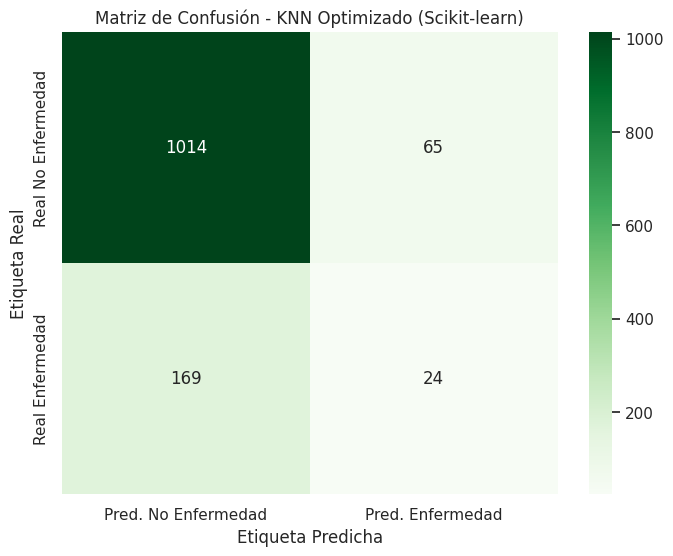

In [45]:
sklearn_knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Entrenamiento
sklearn_knn.fit(X_train_final, y_train)

# Hacer predicciones a los casos de prueba
y_pred_knn = sklearn_knn.predict(X_test_final)

print("\n Reporte de Clasificación Final para KNN (k=3):\n")
print(classification_report(y_test, y_pred_knn, target_names=['No Enfermedad (0)', 'Enfermedad (1)']))

# Visualizar la Matriz de Confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn_k3, fp_k3, fn_k3, tp_k3 = cm_knn.ravel()

print(f"Detalle para k=3:")
print(f"  - Diagnosticos que se escaparon (FN): {fn_k3}")
print(f"  - Diagnosticos atrapados (TP):        {tp_k3}")
print("-" * 30)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'])
plt.title('Matriz de Confusión - KNN Optimizado (Scikit-learn)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

### Analisis
El dataset tiene mas pacientes sanos que enfermos, lo que hace que el modelo sea sesgado a la clase 0 que es la mayoritaria.

El modelo sabe predecir muy bien los pacientes que no tienen enfermedad con respecto a los que si tienen.

Se adiciono un hiperparametro de weight='distance' que va a permitir predecir mas casos de enfermedad pero sacrificandose la precision para los casos que no tienen enfermedad. En este caso de uso en medicina se prefiere bajar los falsos negativos, es decir, aumentar los verdaderos positivos.

### Hiperparametros K
De acuerdo a los 3 casos de prueba con los k de k=3 (grafica verde) - k=1 (grafica azul) y k=100 (grafica roja).

Se puede observar que el k=1 es un caso de sobreajuste, donde ya el modelo aprendio mucho sobre los detalles, es por eso, que es el modelo que mas verdaderos positivos predice.

La varianza es alta y sesgo bajo ya que se ajusta perfecto a los datos de entrenamiento.

Con el k=100 el modelo cae en un subajuste, donde practicamente predice todo los casos que no son enfermedad, es decir, tiene una alta precision a lo que corresponde a la clase mayoritaria pero cuando tiene que predecir si el caso es enfermedad no predice ningun caso.

La varianza es baja ya que es estable frente a cambios en los datos y sesgo alto ya que no captura los detalles.

Finalmente, cuando el k=3 muestra un punto intermedio falla en los verdaderos positivos pero al menos logra identificar casos de enfermedad. Ademas, el F1-Score tiene un mejor rendimiento que los extremos, porque tiene a balancear mas la sensibilidad y la precision

La varianza y el sesgo son mas flexibles, aunque haya sesgo a la clase mayoritaria, puede capturar patrones en la clase minoritaria.

### Dimensionalidad
Con respecto a la dimensionalidad, este problema aparece cuando hay muchas variables predictoras en el dataset y es un tema que perjudica a los modelos que se basan en distancias como el KNN.

Debido, a que cada dimension al expandir el espacio de busqueda, el punto mas cercano y el mas lejano terminan teniendo distancias similares, es por eso, que se necesita cubrir ese espacio con datos para que los vecinos sean representativos a lo que es un problema con el dataset ya que hay un desbalance en la informacion.

### Interpretabilidad

Un modelo de KNN no es 100% interpretable pero si se puede justifcar porque el paciente es clasificado de alto riesgo. En este caso, es porque hubo pacientes que ya presentaban caracteristicas similares que hizo que el nuevo pacientes fuera clasificado con un riesgo alto

# Modelado con Regresion Logistica

In [46]:

# Regularizacion
model_logistic = LogisticRegression(penalty='l1', solver='liblinear')
model_logistic.fit(X_train,y_train)

y_pred_logistic = model_logistic.predict(X_test)



#### Funcion Sigmoide

La funcion de sigmoide permite que convierta la salida lineal en un valor entre 0 y 1, lo que hace que se pueda interpretar la salida como probabilidad.

#### Regularizacion

La regularizacion introduce el termino de penalizacion en la funcion de costo para controlar el tamaño de los coeficientes.

Cuando la regularizacion es L1, los coeficientes se vuelven exactamente o y es util para la seleccion de variables.

Si la penalizacion en L2 no lleva los coeficientes a 0 sino los hace mas pequeños y es util para evitar el sobreajuste y poder manejar la multicolinealidad.

Para este dataset, la L1 toma en cuenta las variables que son mas explicativas y dejar por fuera aquellas que son menos importantes y la L2 para poder estabilizar los coeficientes y no se inflen por la correlacion.

In [47]:
# Coeficientes
coef_df = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": model_logistic.coef_[0]
})
coef_df["Odds Ratio"] = np.exp(coef_df["Coeficiente"])
print(coef_df)

             Variable  Coeficiente  Odds Ratio
0                male     0.400079    1.491942
1                 age     0.063858    1.065941
2           education    -0.045822    0.955212
3       currentSmoker    -0.077344    0.925571
4          cigsPerDay     0.026972    1.027340
5              BPMeds     0.424770    1.529239
6     prevalentStroke     1.069631    2.914304
7        prevalentHyp     0.224503    1.251701
8            diabetes     0.097620    1.102544
9             totChol     0.002370    1.002373
10              sysBP     0.015586    1.015708
11              diaBP    -0.004695    0.995316
12                BMI    -0.001173    0.998828
13          heartRate    -0.003434    0.996572
14            glucose     0.006735    1.006758
15  education_encoder     0.038204    1.038943


### Coeficientes

Un coeficiente positivo indica que a medida que aumenta el numero de cigarrillos fumados por dia, aumenta la probabilidad de padecer la enfermedad coronaria.

El odds ratio siginifica que por cada cigarillo adicional fumado al dia la probabilidad de que aumente el riesgo de padecer la enfermedad coronaria es del 2.7%


 Reporte de Clasificación Final para Regresion Logistica
                   precision    recall  f1-score   support

No Enfermedad (0)       0.85      0.99      0.92      1079
   Enfermedad (1)       0.46      0.06      0.11       193

         accuracy                           0.85      1272
        macro avg       0.66      0.52      0.51      1272
     weighted avg       0.80      0.85      0.79      1272

Detalle para regresion logistica
  - Diagnosticos que se escaparon (FN): 181
  - Diagnosticos atrapados (TP):        12
------------------------------


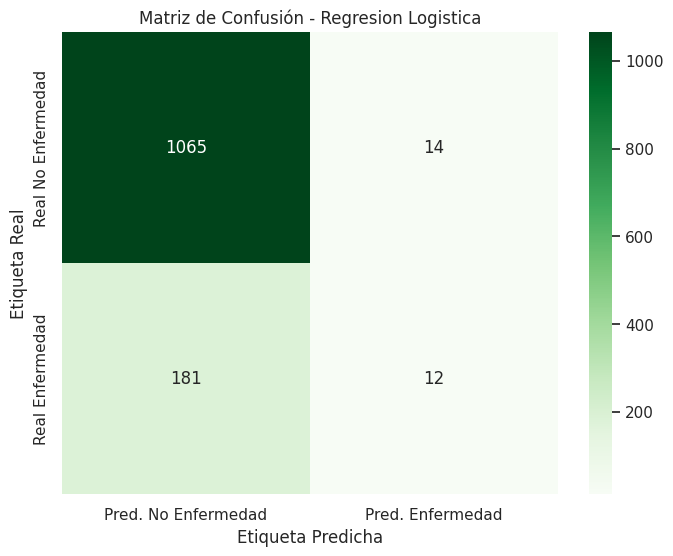

In [48]:
print("\n Reporte de Clasificación Final para Regresion Logistica")
print(classification_report(y_test, y_pred_logistic, target_names=['No Enfermedad (0)', 'Enfermedad (1)']))

confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
tn_l, fp_l, fn_l, tp_l = confusion_logistic.ravel()

print(f"Detalle para regresion logistica")
print(f"  - Diagnosticos que se escaparon (FN): {fn_l}")
print(f"  - Diagnosticos atrapados (TP):        {tp_l}")
print("-" * 30)


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_logistic, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'])
plt.title('Matriz de Confusión - Regresion Logistica')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

### Supuestos del modelo de regresion logistica

1. Ausencia de multicolinealidad entre variables predictoras
2. Linealidad en el logit para las variables continuas

In [49]:
# Ausencia de multicolinealidad entre variables predictoras
X_const = add_constant(X)
vif_df =  pd.DataFrame({
    "variables": X_const.columns,
    "VIF":[variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
})

print(vif_df)

            variables       VIF
0               const  0.000000
1                male  1.193381
2                 age  1.373066
3           education       inf
4       currentSmoker  2.454222
5          cigsPerDay  2.574032
6              BPMeds  1.100913
7     prevalentStroke  1.019034
8        prevalentHyp  2.053332
9            diabetes  1.589285
10            totChol  1.106863
11              sysBP  3.736745
12              diaBP  2.963995
13                BMI  1.236653
14          heartRate  1.095421
15            glucose  1.611437
16  education_encoder       inf


/usr/local/lib/python3.12/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Todas las variables tienen un VIF menor a 5, lo que indica que no hay un problema de multicolinealidad.

Hay 4 variables predictoras que tienen los valores mas altos, que son :
- currentSmoker
- cigsPerDay
- sysBP
- diaBP

Sin embargo, estan dentro de los rangos aceptables.

In [51]:
#Linealidad en el logit para las variables continuas
numeric_cols = (
    df.select_dtypes(include=np.number)
      .drop(columns=['TenYearCHD', 'education_encoder'], errors='ignore')
      .columns.intersection(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])
      .tolist()
)
for col in numeric_cols:
    df[f"{col}_log"] = df[col] * np.log(df[col] + 1)  # +1 para evitar log(0)

    model = logit(f"TenYearCHD ~ {col} + {col}_log", data=df).fit(disp=0)

    print(f"Variable: {col}")
    print(model.summary())
    print("\n" + "="*80 + "\n")


Variable: cigsPerDay
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4235
Method:                           MLE   Df Model:                            2
Date:                Sun, 05 Oct 2025   Pseudo R-squ.:                0.004269
Time:                        03:20:07   Log-Likelihood:                -1798.1
converged:                       True   LL-Null:                       -1805.8
Covariance Type:            nonrobust   LLR p-value:                 0.0004489
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.8156      0.060    -30.398      0.000      -1.933      -1.699
cigsPerDay        -0.0157      0.025     -0.633      0.527      -0.064       0.033
cigsPerDay_log 

### Analisis

En regresion logistica se asume que las variables numericas continuas tienen una relacion lineal con el logit de la probabilidad, en este caso, con la probabilidad de que ocurra tener la enfermedad coronaria  (TenYearCHD).

El metodo de test Box-Tidwell verifica que la variable es significativa, es decir, que no tiene una relacion lineal con la variable target y se hace a traves del algoritmo natural de la variable. Se considera que:
- Variable es significativa :**P<0.05** se asume no linealidad (no se cumple el supuesto)
- Variable no significativa : **P>0.05** se asume una linealiad (se cumple con el supuesto)

Unicamente la variable que no cumple con el supuesto es diaBp con un P de 0.012 lo que hace que el modelo no represente bien la relacion, ya que el modelo piensa que siempre hay una relacion lineal.Esto, puede hacer que se generen coeficientes engañosos o malas predicciones.

Para esa variable se puede tener en cuenta:
- Tranformacion de la variable
- Inlcusion del termino no lineal
- Usar modelos mas flexibles

# Evaluacion Comparativa y Conclusiones

## Matriz de confusion

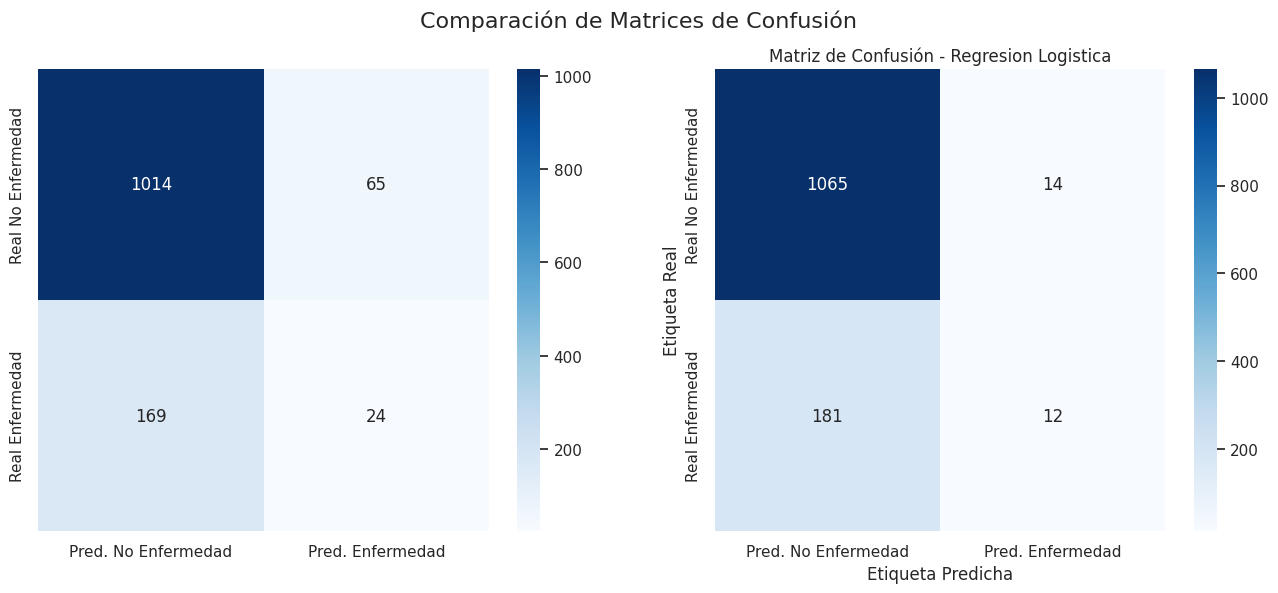

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Comparación de Matrices de Confusión', fontsize=16)


sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'],
             ax=axes[0])
plt.title('Matriz de Confusión - KNN Optimizado (Scikit-learn)')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')

sns.heatmap(confusion_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred. No Enfermedad', 'Pred. Enfermedad'],
            yticklabels=['Real No Enfermedad', 'Real Enfermedad'],
            ax=axes[1])
plt.title('Matriz de Confusión - Regresion Logistica')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')

plt.show()





### Analisis

Para el sector de la salud, es mas critico no detectar los pacientes que tienen un alto riesgo de padecer la enfermedad, ya que esto puede resultar en muerte o en eventos cardiacos graves.

Por esto, es mas grave dejar pasar un falso negativo porque el impacto en el paciente sera no recibir tratamientos oportunos y a largo plazo para el sistema generara muchos costos, como urgencias, hopitalizaciones y tratamientos avanzdos.

Por lo contrario, detectar o alertar demas en falsos positivos solo incurrira en que el paciente se somete a mas estudios o tratamientos innecesarios.



## Curva ROC y AUC

Área bajo la curva ROC (AUC)- KNN: 0.5734
Área bajo la curva ROC (AUC) - REGRESION LOGISTICA: 0.7023


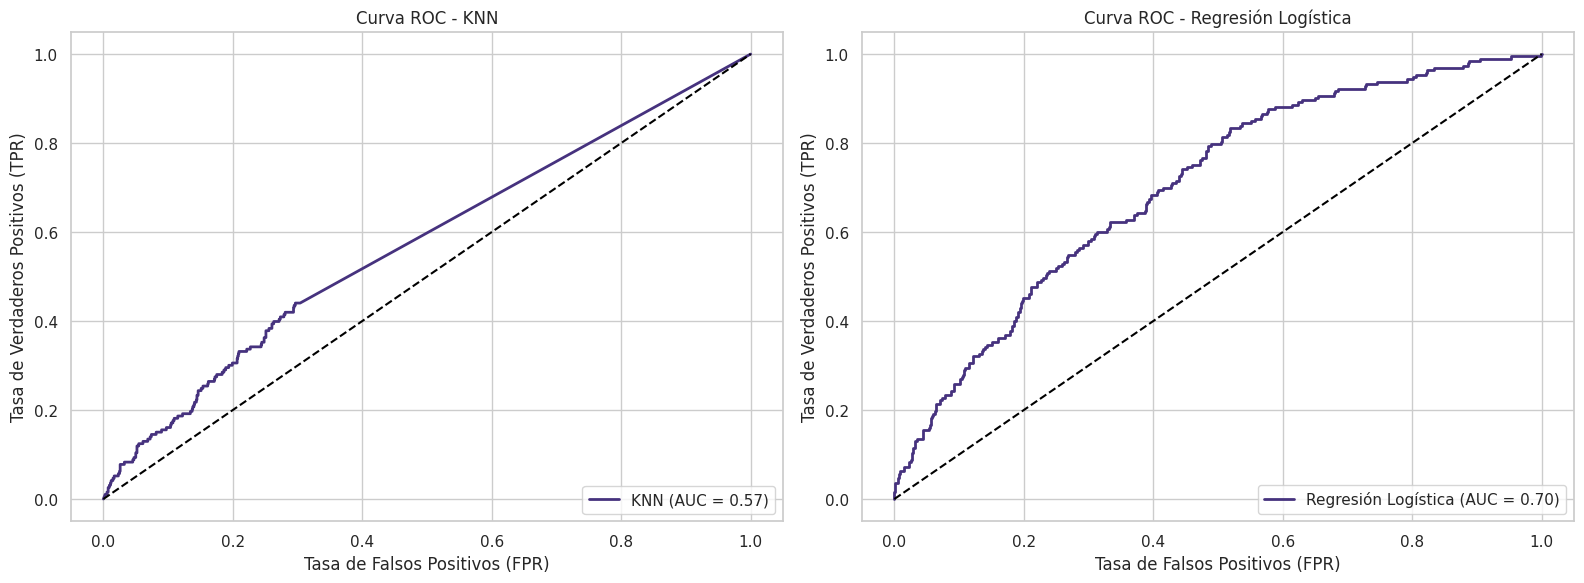

In [55]:
# KNN CON K = 3
y_prob_knn = sklearn_knn.predict_proba(X_test_final)[:, 1]
fp_k3,tp_k3, thresholds_roc = roc_curve(y_test, y_prob_knn)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"Área bajo la curva ROC (AUC)- KNN: {roc_auc_knn:.4f}")

# Regresion logistica
y_prob_logistic = model_logistic.predict_proba(X_test)[:, 1]
fp_l, tp_l, thresholds_roc = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
print(f"Área bajo la curva ROC (AUC) - REGRESION LOGISTICA: {roc_auc_logistic:.4f}")

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KNN
axes[0].plot(fp_k3, tp_k3, linewidth=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[0].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[0].set_title('Curva ROC - KNN')
axes[0].grid(True)
axes[0].legend(loc="lower right")

# Regresión Logística
axes[1].plot(fp_l, tp_l, linewidth=2, label=f'Regresión Logística (AUC = {roc_auc_logistic:.2f})')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlabel('Tasa de Falsos Positivos (FPR)')
axes[1].set_ylabel('Tasa de Verdaderos Positivos (TPR)')
axes[1].set_title('Curva ROC - Regresión Logística')
axes[1].grid(True)
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

### Analisis

La Curva ROC muestra la precision entre verdaderos positivos y falsos positivos y el AUC muestra esa relacion entre un numero entre 0 y 1.

El KNN tuvo un AUC del 0.57% lo que indica un desempeño bajo, teniendo en cuenta que se tomo su mejor K.

La regresion logistica tuvo un desempeño del 0.70%, indica una buena capacidad de discriminacion.

Segun esta grafica, la regresion logistica tiene una mejor capacidad de clasificacion para detectar verdaderos positivos y evitar falsos positivos.

Hay que tener en cuenta, que la regresion logistica con el umbral del 0.5% no detecta tantos verdaderos positivos coomo el KNN, sin embargo, el AUC no tiene en cuenta este umbral, es decir, su valor no depende unicamente de este corte.

En conclusion el modelo de la regresion logistica es mas confiable para apoyar las decsiones de deteccion de enfermedad coronaria.

### Precision vs Recall

Para la regresion logistica se mantuvo el umbral por defecto que es 0.5, lo que quiere decir que cuando el modelo estima la probabilidad del 0.5 p > 0.5 de que el paciente pueda tener enfermedad coronaria se clasifica como 1 de lo contrario como 0.

Si se aumenta el umbral quiere decir, que se va a priorizar la precision sobre la sensibilidad, es decir, pueda que muchos casos que pueden tener la enfermedad se conviertan en falsos negativos, ya que el modelo solo cuando este muy seguro va a predecir que si puede tener la enfermedad.

Si se disminuye el umbral como por ejemplo a 0.3 se favorece mas a la sensibilidad sobre la precision, ya que el modelo ahora va a aumentar el numero de verdaderos positivos y por ende a dismiuir los falsos negativos, es decir, va a predecir muchos casos en donde el paciente va a adquirir la enfermedad.



--- Resultados con umbral = 0.3 ---
[[983  96]
 [146  47]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1079
           1       0.33      0.24      0.28       193

    accuracy                           0.81      1272
   macro avg       0.60      0.58      0.59      1272
weighted avg       0.79      0.81      0.80      1272


--- Resultados con umbral = 0.5 ---
[[1065   14]
 [ 181   12]]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1079
           1       0.46      0.06      0.11       193

    accuracy                           0.85      1272
   macro avg       0.66      0.52      0.51      1272
weighted avg       0.80      0.85      0.79      1272


--- Resultados con umbral = 0.7 ---
[[1079    0]
 [ 191    2]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1079
           1       1.00      0.01      0.02      

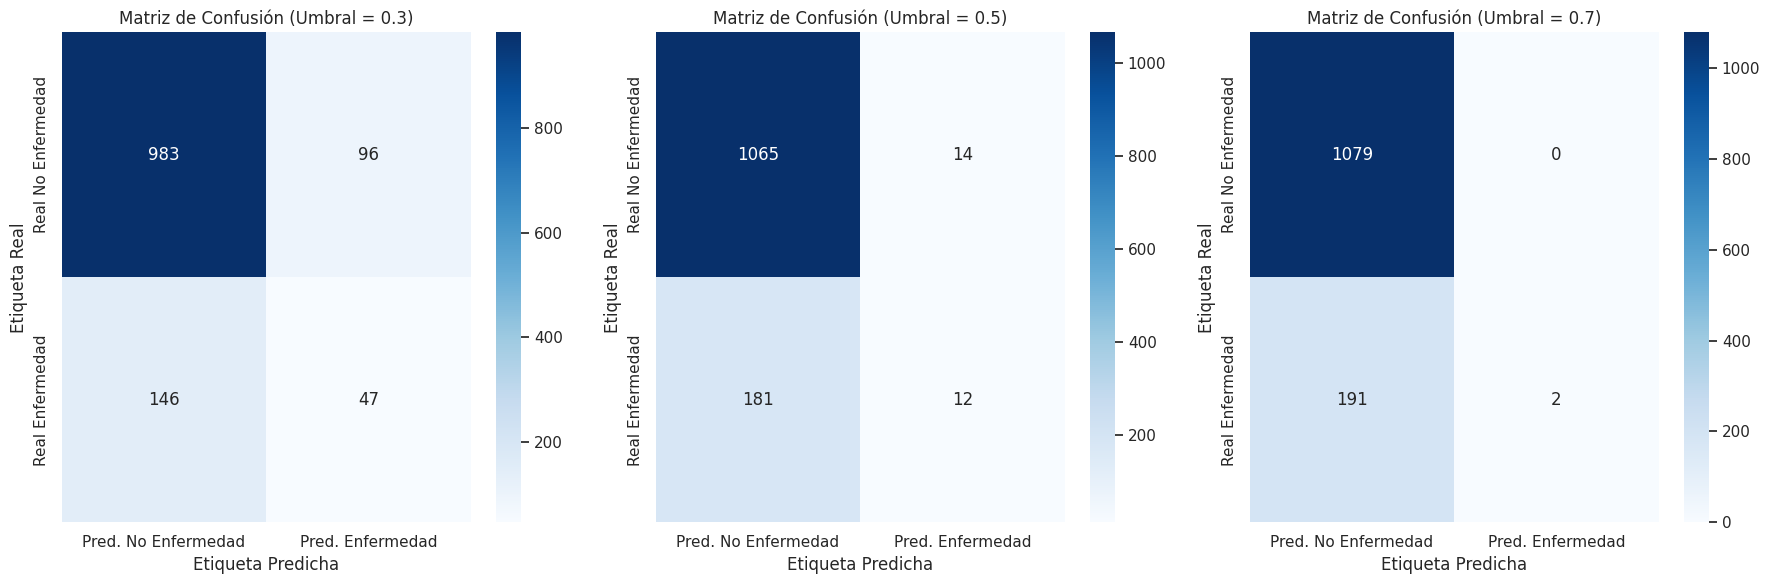

In [58]:
# Verificando umbrales
y_prob_logistic = model_logistic.predict_proba(X_test)[:, 1]

umbrales = [0.3, 0.5, 0.7]

fig, axes = plt.subplots(1, len(umbrales), figsize=(18, 6))

for i, umbral in enumerate(umbrales):
    y_pred_custom = (y_prob_logistic >= umbral).astype(int)
    cm = confusion_matrix(y_test, y_pred_custom)

    print(f"\n--- Resultados con umbral = {umbral} ---")
    print(cm)
    print(classification_report(y_test, y_pred_custom))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Matriz de Confusión (Umbral = {umbral})')
    axes[i].set_xlabel('Etiqueta Predicha')
    axes[i].set_ylabel('Etiqueta Real')
    axes[i].set_xticklabels(['Pred. No Enfermedad', 'Pred. Enfermedad'])
    axes[i].set_yticklabels(['Real No Enfermedad', 'Real Enfermedad'])

plt.tight_layout()
plt.show()

### Recomendacion Final

In [54]:
f1_score_knn = f1_score(y_test,y_pred_knn)
f1_score_logistic = f1_score(y_test,y_pred_logistic)

print(f'f1-score KNN: {f1_score_knn}')
print(f'f1-score Regresion Logistica: {f1_score_logistic}')

f1-score KNN: 0.1702127659574468
f1-score Regresion Logistica: 0.1095890410958904


De acuerdo con las métricas de F1-Score, ROC-AUC y la matriz de confusión, ninguno de los dos modelos analizados presenta un desempeño adecuado para ser utilizado en la predicción de la enfermedad.

El F1-Score en ambos casos es muy bajo, lo que evidencia un fuerte sesgo hacia la clase mayoritaria (pacientes sin enfermedad). Esto significa que los modelos tienden a clasificar incorrectamente a los pacientes que realmente presentan riesgo, lo cual es especialmente crítico en un contexto médico, donde los falsos negativos pueden tener consecuencias graves.

Aunque la Regresión Logística obtuvo un mejor resultado en la métrica AUC (0.70) en comparación con el modelo KNN (0.57), este valor aún representa un nivel de discriminación moderado y no lo suficientemente confiable para decisiones clínicas.

Por lo tanto, se recomienda utilizar  modelos más robustos que permitan mejorar la capacidad predictiva y la sensibilidad hacia la clase minoritaria.